# PCA 실습

#### 데이터 불러오기

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings(action = 'ignore')

In [85]:
df = pd.read_csv('./최종분석데이터.csv', encoding='cp949')

In [86]:
df.head(10)

,base_date,emd_nm,em_g,kor_0104050_resd,kor_0104050_work,kor_0104050_visit,kor_2030_resd,kor_2030_work,kor_2030_visit,kor_607080_resd,...,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),latitude,longitude,base_year,base_month,base_weekday,holiday
0,2018-01-01,남원읍,1239600.0,161893.2039,11251.9970,124226.7003,48643.9724,3986.9567,59098.6273,73921.0157,...,4.5,10.9,0.0,10.1,33.30767,126.69075,2018,1,0,0
1,2018-01-02,남원읍,1569850.0,160868.0605,16338.9174,88932.5615,48184.7578,6625.6513,41218.6999,75059.0400,...,3.7,12.4,0.0,9.1,33.30767,126.69075,2018,1,1,0
2,2018-01-03,남원읍,1405650.0,159016.0288,16257.5122,95911.0265,47117.7026,6232.9732,43668.8342,74357.0546,...,4.3,12.4,0.0,12.3,33.30767,126.69075,2018,1,2,0
3,2018-01-04,남원읍,1390250.0,152052.4749,15998.5791,102616.6265,46071.8138,6105.8043,44671.1813,73721.5673,...,3.4,9.9,1.0,13.0,33.30767,126.69075,2018,1,3,0
4,2018-01-05,남원읍,1585700.0,157448.7068,14269.5891,97471.6303,46934.7270,5993.6933,41295.5713,75047.7345,...,3.1,11.0,3.0,15.2,33.30767,126.69075,2018,1,4,0
5,2018-01-06,남원읍,1180950.0,159477.4300,12339.7053,113602.2739,45592.6286,3921.3841,48068.5936,75677.2670,...,2.9,11.4,0.0,11.8,33.30767,126.69075,2018,1,5,0
6,2018-01-07,남원읍,1391500.0,164287.5460,11153.0180,103418.3217,48151.9750,3181.3566,44920.3410,76128.2039,...,3.4,12.4,7.0,7.6,33.30767,126.69075,2018,1,6,0
7,2018-01-08,남원읍,1328350.0,159508.2007,14448.3629,92619.6091,46934.6389,6359.4560,38863.4046,75287.0292,...,5.4,13.0,3.5,13.6,33.30767,126.69075,2018,1,0,0
8,2018-01-09,남원읍,1281850.0,158230.5695,14696.3922,99681.1181,47565.5999,6138.0941,42226.5392,74854.3375,...,1.4,8.6,0.0,10.9,33.30767,126.69075,2018,1,1,0
9,2018-01-10,남원읍,923750.0,161591.7289,13479.9695,91605.6975,47725.7800,5941.2214,41011.1796,74928.8162,...,-1.3,5.2,2.5,13.1,33.30767,126.69075,2018,1,2,0


# 변수 설명
* Base_date: 날짜
* emd_nm : 제주도 행정동
* em_g : 음식물 쓰레기 배출량(target)
* kor_0104050_resd/work/visit : 가족단위 거주/근무/방문 유동인구 수
* kor_2030_resd/work/visit : 2030세대 거주/근무/방문 유동인구 수
* kor_607080_resd/work/visit : 607080세대 거주/근무/방문 유동인구 수
* kor_nighttime_resd : 야간 거주인구 수
* kor_daytime_work/read/visit : 주간근무/거주/방문 유동인구 수 
* kor_jeju_resd : 제주 주민등록상 거주인구 수
* long_CHN_resd/work/visit : 장기체류 거주/근무/방문 인구 수 (중국)
* long_ETC_resd/work/visit : 장기체류 거주/근무/방문 인구 수 (그 외 나라)
* long_daytime_resd/work/visit : 장기체류 주간 거주/근무/방문 인구 수
* long_nighttime_resd/work/visit : 장기체류 야간 거주/근무/방문 인구 수
* short_CHN_visit : 단기체류 방문 인구 수 (중국)
* short_ETC_visit : 단기체류 방문 인구 수 (그 외)
* kor_change_jeju_work : 제주 근무인구 변화율
* kor_change_other_work : 그외 근무인구 변화율
* kor_change_jeju_visit : 제주 방문인구 변화율
* kor_change_other_visit : 그외 방문인구 변화율
* kor_change_jeju_resd : 제주 거주인구 변화율
* resid/foreign_male : 내국인/외국인 남자 비율
* foreign_pop_male : 남자 외국인 거주인구
* resid/foreign_male : 내국인/외국인 남자 비율
* foreign_pop_male : 내국인 남자인구 수
* resid/foreign_male : 내국인/외국인 남자 비율
* resid/reg_pop_female : 내국인 여자인구 수
* foreign_pop_female : 외국인 여자인구 수
* resid/foreign_female : 내국인/외국인 여자 비율
* density_pop : 인구밀도
* numercial_index_house : 내식지수
* numercial_index_takeout : 중식지수
* numercial_index_eatout: 외식지수
* em_area_cd : 배출거점 개수
* place : 장소
* house_hold : 세대 수
* longitude : 경도
* latitude : 위도
* holiday : 공휴일

In [87]:
# clustering 떄와 유사하게 PCA에 적합하지 않는 변수들 일단 제거
df_conti = df.drop(['kor_je/ot_work','kor_je/ot_visit','long_je/ot_work','long_je/ot_visit','visit_sports','rate_sports','visit_work','rate_work','visit_tour','rate_tour','visit_family','rate_familly','visit_education','rate_education','visit_etc','rate_etc','ESG'], axis=1)

In [88]:
# 날짜와 장소는 필요 X
df_conti = df_conti.drop(['base_date', 'base_year', 'base_month', 'base_month', 'base_weekday', 'holiday', 'emd_nm', 'place', 'latitude', 'longitude'], axis=1)

In [89]:
X = df_conti.drop(['em_g'], axis=1)
y = df_conti['em_g']

In [90]:
X

,kor_0104050_resd,kor_0104050_work,kor_0104050_visit,kor_2030_resd,kor_2030_work,kor_2030_visit,kor_607080_resd,kor_607080_work,kor_607080_visit,kor_daytime_resd,...,density_pop,numerical_index_house,numerical_index_takeout,numerical_index_eatout,em_area_cd,house_hold,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s)
0,161893.2039,11251.9970,124226.7003,48643.9724,3986.9567,59098.6273,73921.0157,2483.5496,30515.7112,11016.90700,...,104.394733,107.365379,100.495129,110.144907,44.0,8345.0,4.5,10.9,0.0,10.1
1,160868.0605,16338.9174,88932.5615,48184.7578,6625.6513,41218.6999,75059.0400,3749.3453,29951.4725,10509.82792,...,104.394733,80.529181,95.326141,89.754124,45.0,8345.0,3.7,12.4,0.0,9.1
2,159016.0288,16257.5122,95911.0265,47117.7026,6232.9732,43668.8342,74357.0546,4223.4596,32003.2287,10337.95073,...,104.394733,82.118890,88.805415,76.223868,44.0,8345.0,4.3,12.4,0.0,12.3
3,152052.4749,15998.5791,102616.6265,46071.8138,6105.8043,44671.1813,73721.5673,3738.3850,32635.5634,10007.21505,...,104.394733,75.092890,88.994214,101.700000,49.0,8345.0,3.4,9.9,1.0,13.0
4,157448.7068,14269.5891,97471.6303,46934.7270,5993.6933,41295.5713,75047.7345,3623.6905,24450.4517,10354.50929,...,104.394733,79.266891,136.319458,136.632002,45.0,8345.0,3.1,11.0,3.0,15.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47848,136018.8139,9192.5939,68003.5263,39003.3787,5192.0738,35112.1860,75241.1246,2964.4829,23920.1270,9602.46063,...,94.141579,274.349199,95.399361,81.913881,36.0,6203.0,23.0,30.0,126.0,8.9
47849,91666.5183,7370.3102,42095.1452,24040.1189,3453.9769,28566.7175,63613.1822,2748.6736,14194.9058,6750.22070,...,119.527300,53.855677,257.395171,81.312739,57.0,4910.0,23.0,29.0,78.0,7.6
47850,264706.4084,18924.1889,127299.9192,86840.8710,10277.4277,91850.3038,137625.3610,6654.4550,33973.0919,19006.99578,...,267.924241,134.348073,119.501641,75.453400,107.0,10584.0,22.0,30.0,128.0,6.4
47851,375954.4074,21267.4567,154848.0001,111626.9872,12651.8010,52181.8281,106966.5188,5357.0712,34997.4029,19360.39567,...,2958.942099,97.099253,107.670704,72.241763,68.0,9682.0,24.0,32.0,110.0,5.9


- 스케일링하기 전 범위가 너무 큰 데이터 대체

In [91]:
X.replace({-np.inf: -1_000_000, np.inf: 1_000_000}, inplace=True)

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler = StandardScaler()

In [94]:
X_scaled = scaler.fit_transform(X)

In [95]:
X_scaled

array([[-0.12602128, -0.35100636,  0.35352875, ..., -1.20517509,
        -0.16934298,  0.16245154],
       [-0.13134163, -0.15344564, -0.12157748, ..., -1.00949329,
        -0.16934298, -0.08192131],
       [-0.14095341, -0.15660717, -0.02763802, ..., -1.00949329,
        -0.16934298,  0.70007182],
       ...,
       [ 0.40756453, -0.05304145,  0.39489838, ...,  1.28650656,
         1.16252208, -0.74172802],
       [ 0.98492571,  0.03796404,  0.76573232, ...,  1.54741563,
         0.97522856, -0.86391444],
       [-0.71168301, -0.70207668, -1.08690861, ...,  1.15605202,
         2.26547284, -0.5951043 ]])

In [96]:
columns = X.columns

In [97]:
X_scaled = pd.DataFrame(X_scaled, columns=columns)

- 변수들 corr 히트맵

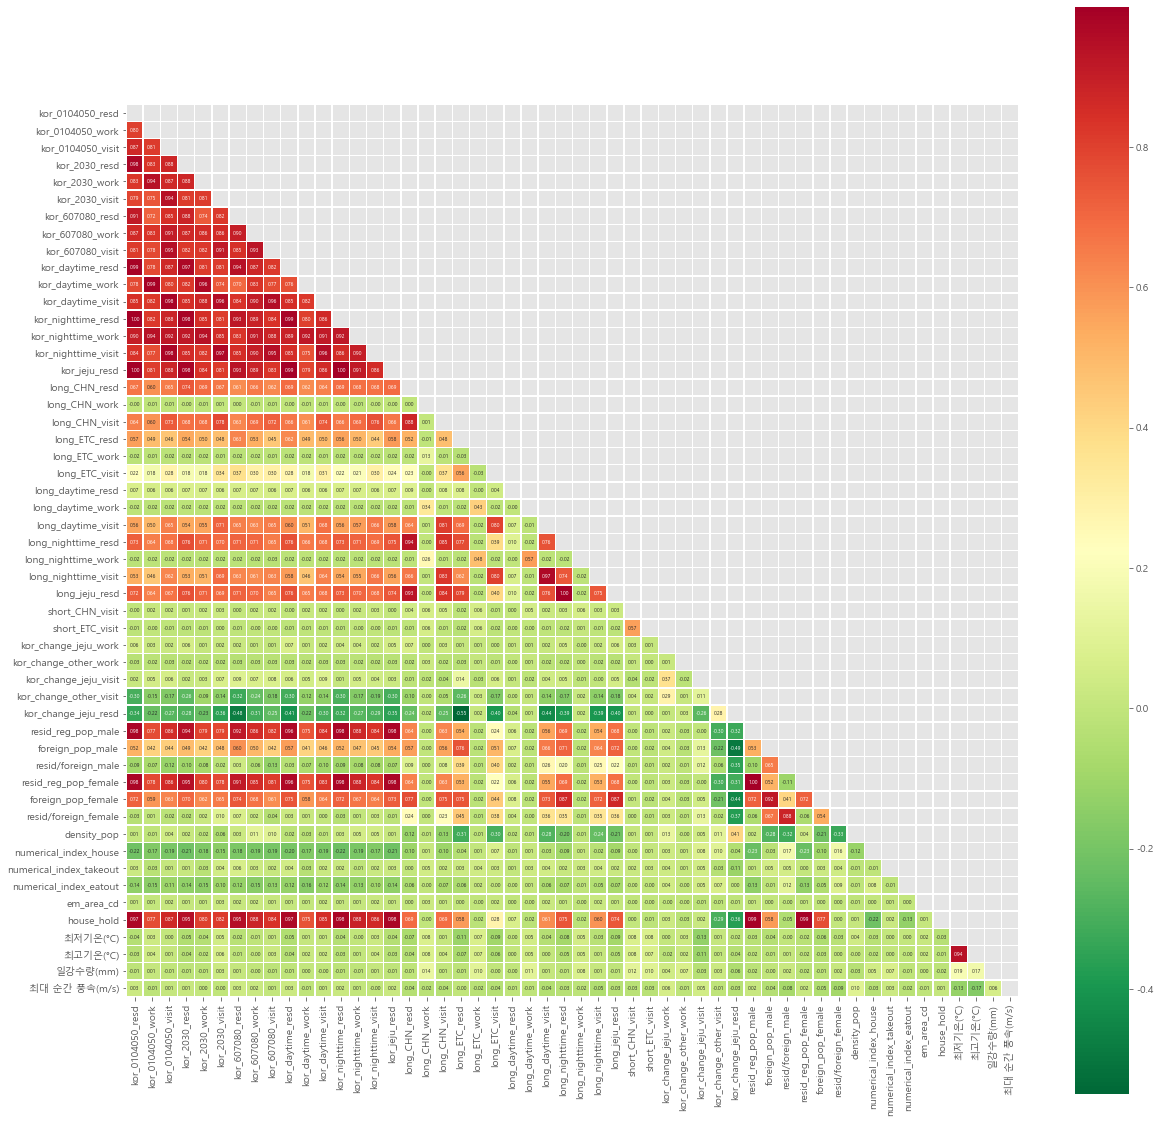

In [99]:
# 옵션 지정
mask = np.zeros_like(X_scaled.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵 시각화
plt.figure(figsize = (20, 20))
sns.heatmap(X_scaled.corr(), mask = mask, square = True, linewidths = 0.5, cmap = 'RdYlGn_r', annot = True, fmt = '.2f', annot_kws = {'fontsize' : 5})
plt.show()

- 상관계수가 높은 변수들만 추출

In [114]:
new_X = pd.concat([X_scaled.iloc[:, 0:17], X_scaled.iloc[:, 18:20], X_scaled.iloc[:, 24:26], X_scaled.iloc[:, 27:29], X_scaled.iloc[:, 36:38], X_scaled.iloc[:, 39:41], 
          X_scaled.iloc[:, 47]], axis=1)

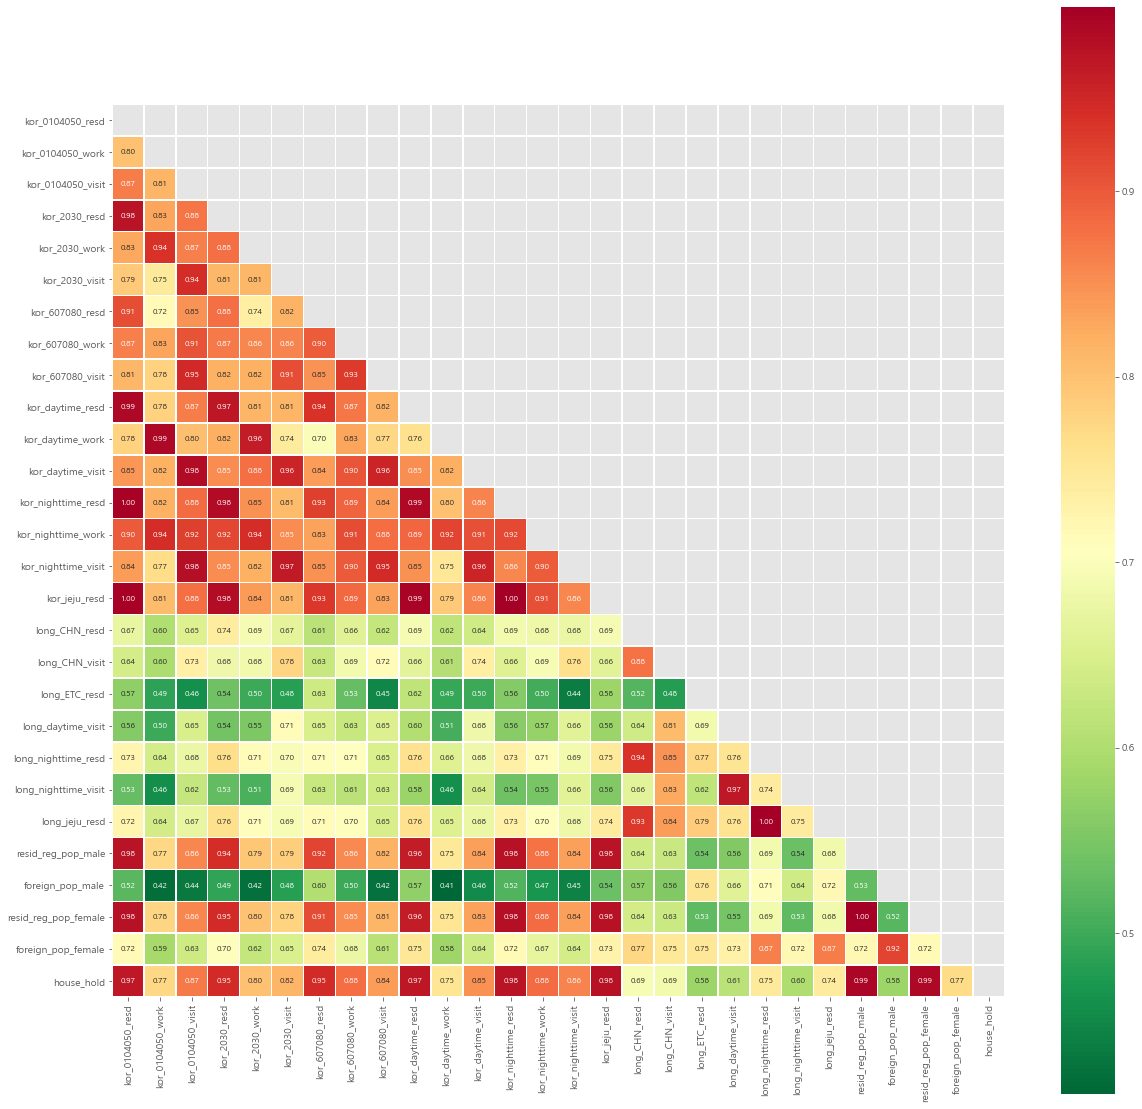

In [118]:
# 옵션 지정
mask = np.zeros_like(new_X.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵 시각화
plt.figure(figsize = (20, 20))
sns.heatmap(new_X.corr(), mask = mask, square = True, linewidths = 0.5, cmap = 'RdYlGn_r', annot = True, fmt = '.2f', annot_kws = {'fontsize' : 8})
plt.show()

- 주성분 개수 결정 위해 scree plot과 누적 기여율 확인

In [144]:
# 모든 독립변수 개수(28개)만큼 주성분 개수 설정해서 분석하기
from sklearn.decomposition import PCA

pca = PCA(n_components=28)
pca_array = pca.fit_transform(new_X)
pca_df = pd.DataFrame(pca_array, index=new_X.index,
                      columns=[f"pca{num+1}" for num in range(new_X.shape[1])])
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28
0,-0.410969,0.238889,-0.650657,-0.716798,0.226437,-0.293861,-0.858179,0.555052,-0.305943,0.374953,...,-0.030059,0.128597,0.020460,-0.015291,-0.008446,0.000027,0.000438,0.001541,0.000065,-0.000003
1,-0.482195,0.080401,-1.031061,-0.264586,0.605573,0.030381,-0.502025,-0.048164,-0.375719,0.232048,...,-0.009817,0.130181,0.109548,0.025404,0.001710,0.006781,-0.013277,0.001412,0.000051,-0.000008
2,-0.353344,0.064148,-0.683432,-0.465665,0.546425,-0.054257,-0.304930,-0.172318,-0.302563,0.141403,...,-0.034694,0.121233,0.027442,-0.015582,-0.000120,0.006588,-0.011893,0.001145,0.000041,-0.000025
3,-0.344923,0.005075,-0.646263,-0.486996,0.555077,-0.036501,-0.414581,-0.036691,-0.357555,0.258671,...,0.008912,0.138247,0.008045,-0.032657,-0.002561,0.001037,-0.006161,0.001540,0.000034,-0.000021
4,-0.486290,-0.166996,-1.039964,-0.371573,0.591225,0.185528,-0.477645,0.068763,-0.241159,0.365732,...,0.041093,0.114599,0.087654,0.008424,0.000522,-0.005824,0.000292,0.001700,0.000070,-0.000029


In [145]:
# 주성분의 설명력과 기여율 구하기
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(new_X.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,2.143015e+01,7.653465e-01,0.765346
pca2,2.471584e+00,8.826902e-02,0.853616
pca3,1.247145e+00,4.453998e-02,0.898155
pca4,8.891639e-01,3.175519e-02,0.929911
pca5,6.867691e-01,2.452696e-02,0.954438
pca6,3.617299e-01,1.291865e-02,0.967356
pca7,2.944137e-01,1.051456e-02,0.977871
pca8,1.682601e-01,6.009164e-03,0.983880
pca9,8.693106e-02,3.104616e-03,0.986985
pca10,6.770492e-02,2.417982e-03,0.989403


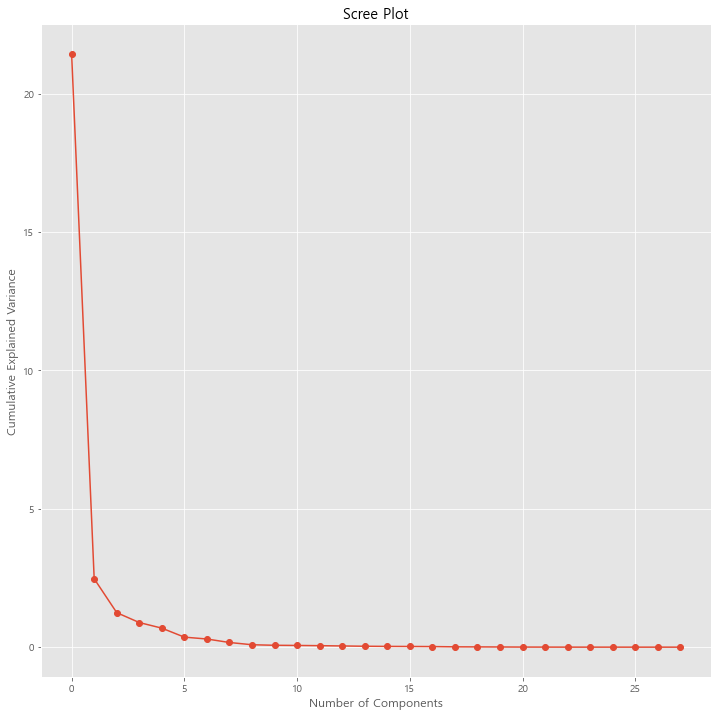

In [146]:
# Scree Plot
plt.figure(figsize = (12,12))
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_, 'o-')

- 주성분 2개로 결정 --> 주성분 2개로 28개의 변수 차원축소

In [147]:
pca = PCA(n_components=2)
pca_array = pca.fit_transform(new_X)
pca_df = pd.DataFrame(pca_array, index=new_X.index,
                      columns=[f"pca{num}" for num in [1, 2]])

In [148]:
pca_df

,pca1,pca2
0,-0.410969,0.238889
1,-0.482195,0.080401
2,-0.353344,0.064148
3,-0.344923,0.005075
4,-0.486290,-0.166996
...,...,...
47848,-1.673064,0.298822
47849,-2.212407,-0.728196
47850,4.604235,-4.882038
47851,1.541193,1.735511


In [149]:
# 주성분의 설명력과 기여율 구하기
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in [0, 1]]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,21.430149,0.765346,0.765346
pca2,2.471584,0.088269,0.853616
